In [54]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
import matplotlib.font_manager

from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [55]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

In [56]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "\nPenalty Area\nEntries", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 1/3 Passes", "Final 1/3 Carries", "pAdj\nPressure Regains",
          "pAdj\nTackles Made", "pAdj\nInterceptions", "Recoveries", "Aerial Win %"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [70, 77, 74, 68, 60, 96, 89, 97, 92, 94, 16, 19, 56, 53, 94]

Text(0, 0, 'criado\ndata')

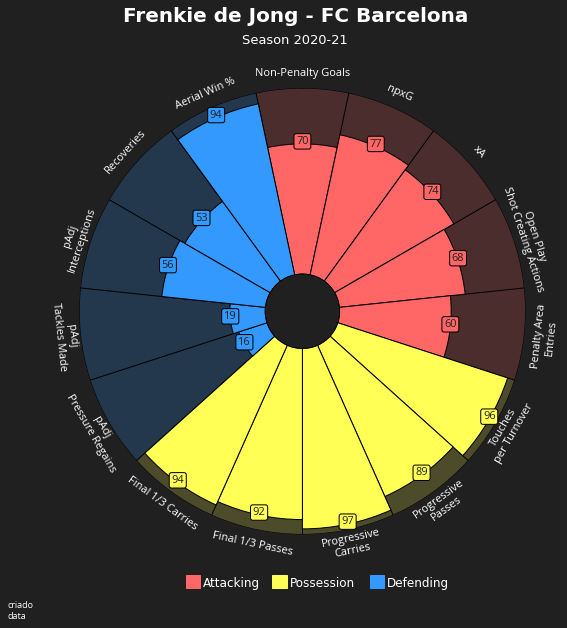

In [109]:
# color for the slices and text
slice_1_color = "#FF6666" #red
slice_2_color = "#FFFF55" #yellow
slice_3_color = "#3399FF" #blue
slice_1_text_color= background
slice_2_text_color= background
slice_3_text_color= background

slice_colors = [slice_1_color] * 5 + [slice_2_color] * 5 + [slice_3_color] * 5
text_colors = [slice_1_text_color] * 5 + [slice_2_text_color] * 5 + [slice_3_text_color] * 5
blank_space_colors = [text_color] * 15

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color=background,     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.2,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color=text_color, fontsize=11,
        fontfamily=body_font, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color=text_color, fontsize=11,
        fontfamily=body_font, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
#ax.set_title("Erling Haaland", weight="bold", fontsize=20, fontfamily=title_font, color=text_color)
fig.text(
    0.5, 0.975, "Frenkie de Jong - FC Barcelona", size=20, weight="bold", fontfamily=title_font, 
    ha="center", color=text_color
)

# add subtitle
fig.text(
    0.5, 0.94,
    "Season 2020-21",
    size=13,
    ha="center", fontfamily=title_font, color=text_color
)

# add text
fig.text(
    0.34, 0.052, "Attacking", size=12,
    fontfamily=title_font, color=text_color
)
fig.text(
    0.49, 0.052, "Possession", size=12,
    fontfamily=title_font, color=text_color
)
fig.text(
    0.66, 0.052, "Defending", size=12,
    fontfamily=title_font, color=text_color
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.05), 0.025, 0.021, fill=True, color=slice_1_color,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.05), 0.025, 0.021, fill=True, color=slice_2_color,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.63, 0.05), 0.025, 0.021, fill=True, color=slice_3_color,
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
#)   # these values might differ when you are plotting

# add credits
CREDIT_1 = "criado"
CREDIT_2 = "data"

fig.text(
    0, 0, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontfamily=body_font, color=text_color,
)
